<a href="https://colab.research.google.com/github/JohannesMRS/Prediksi-Resiko-Diabetes/blob/main/projectML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Langkah Pertama: Import Data

In [ ]:
df = pd.read_csv('Diabetes.csv', index_col = 0)
df

,Kehamilan,Glukosa,Tekanan Darah,Ketebalan Kulit,Insulin,BMI,DiabetesPedigreeFunction,Umur,Hasil
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Langkah Kedua: Data Understanding

In [ ]:
# Mengetahui Banyak baris dan kolom
df.shape

(768, 9)

In [ ]:
# Mengetahui informasi seputar statistika nya
df.describe()

,Kehamilan,Glukosa,Tekanan Darah,Ketebalan Kulit,Insulin,BMI,DiabetesPedigreeFunction,Umur,Hasil
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Mengetahui perbandingan diabetes dengan non diabetes
df['Hasil'].value_counts()

,count
Hasil,
0,500
1,268


In [ ]:
# Mengetahui tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Kehamilan                 768 non-null    int64  
 1   Glukosa                   768 non-null    int64  
 2   Tekanan Darah             768 non-null    int64  
 3   Ketebalan Kulit           768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Umur                      768 non-null    int64  
 8   Hasil                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


## Langkah Ketiga: Cleaning Data

In [ ]:
# Melihat data yang hilang
df.isnull().sum()

,0
Kehamilan,0
Glukosa,0
Tekanan Darah,0
Ketebalan Kulit,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Umur,0
Hasil,0


In [ ]:
# Melihat data yang duplikat
df.duplicated().sum()

np.int64(0)

## Langkah Keempat: Exploratory Data Analysis (EDA)

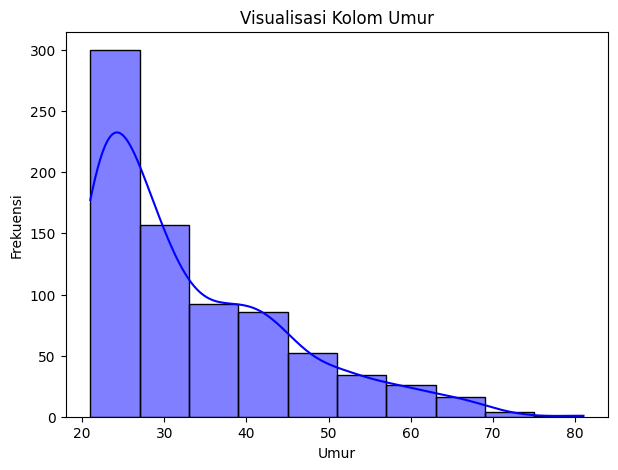

In [ ]:
plt.figure(figsize = (7, 5))
sns.histplot(data = df, x = 'Umur', bins = 10, kde = True, color = 'blue')
plt.title("Visualisasi Kolom Umur")
plt.xlabel("Umur")
plt.ylabel("Frekuensi")
plt.show()

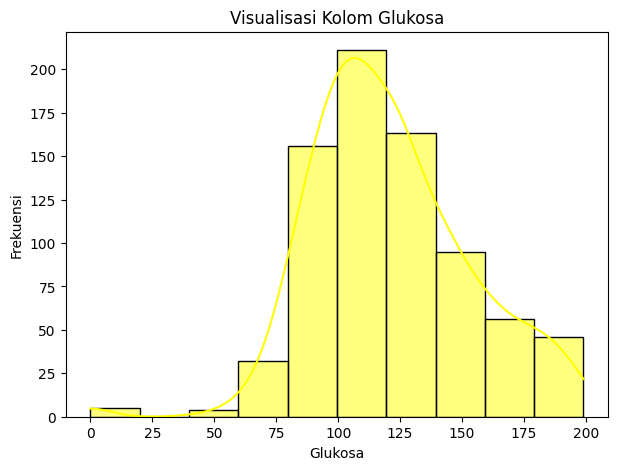

In [ ]:
# Visualisasi data glukosa
plt.figure(figsize = (7, 5))
sns.histplot(data = df, x = 'Glukosa', bins = 10, kde = True, color = 'yellow')
plt.title("Visualisasi Kolom Glukosa")
plt.xlabel("Glukosa")
plt.ylabel("Frekuensi")
plt.show()

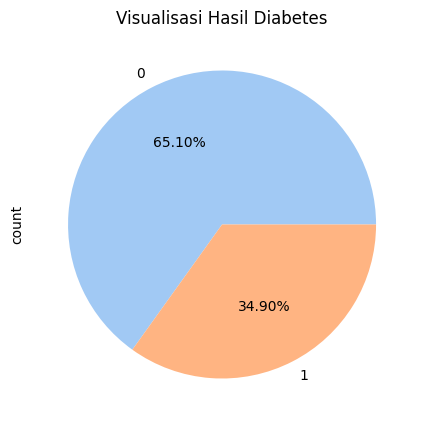

In [ ]:
# Visualisasi data Hasil
plt.figure(figsize = (7,5))
sns.set_palette('pastel')
df['Hasil'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%')
plt.title('Visualisasi Hasil Diabetes')
plt.show()

/tmp/ipython-input-2862021304.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Hasil', palette = 'pastel')


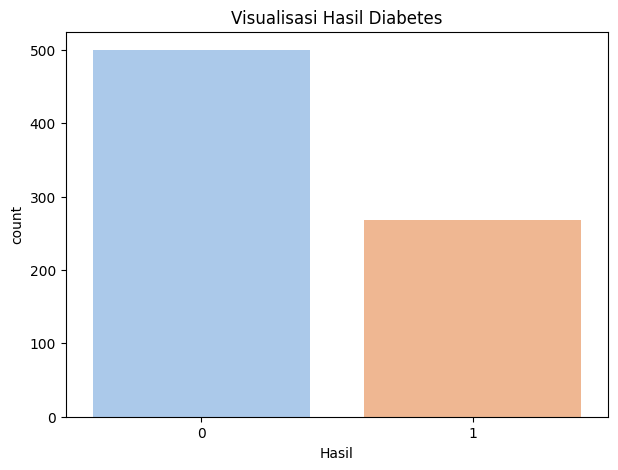

In [ ]:
# Visualisasi data Hasil dalam bentuk diagram batang
plt.figure(figsize = (7,5))
sns.countplot(data = df, x = 'Hasil', palette = 'pastel')
plt.title('Visualisasi Hasil Diabetes')
plt.show()

In [ ]:
# Mengetahui korelasi antar elemen
df.corr()

,Kehamilan,Glukosa,Tekanan Darah,Ketebalan Kulit,Insulin,BMI,DiabetesPedigreeFunction,Umur,Hasil
Kehamilan,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glukosa,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Tekanan Darah,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Ketebalan Kulit,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Umur,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Hasil,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


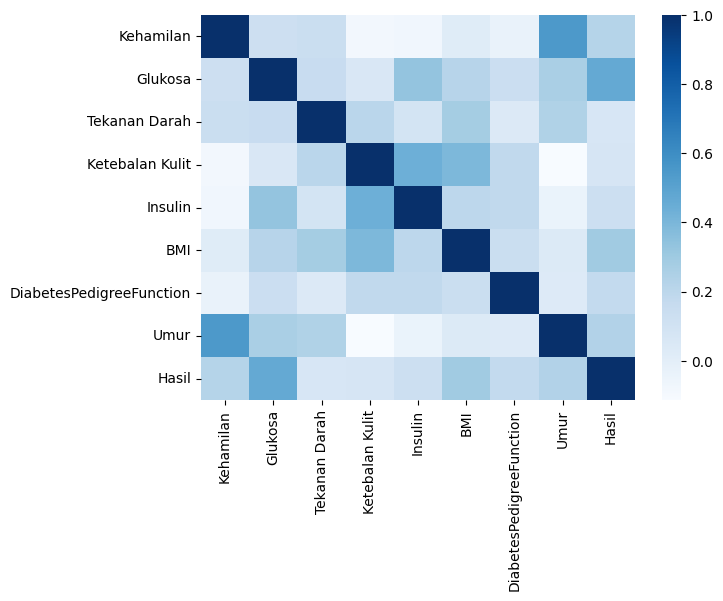

In [ ]:
# Visualisasi Korelasi
plt.figure(figsize = (7,5))
sns.heatmap(df.corr(), cmap = 'Blues')
plt.show()

## Langkah Kelima: Preparation Data

In [ ]:
# Splitting data
X = df.drop('Hasil', axis = 1)
y = df['Hasil']

print('Shape dari x :', X.shape)
print('Shape dari y :', y.shape)

Shape dari x : (768, 8)
Shape dari y : (768,)


In [ ]:
# SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_smote, y_smote = smote.fit_resample(X,y)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.3, random_state = 42)

## Langkah Keenam: Modeling and Evaluation

In [ ]:
# Algoritma Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print("Akurasi algoritma decision tree: {:.2f}%".format(dt_acc*100))

              precision    recall  f1-score   support

           0       0.71      0.70      0.71       149
           1       0.71      0.72      0.72       151

    accuracy                           0.71       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.71      0.71      0.71       300

Akurasi algoritma decision tree: 71.33%


In [ ]:
# Algoritma Random Forest
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print("Akurasi algoritma random forest: {:.2f}%".format(rf_acc*100))

              precision    recall  f1-score   support

           0       0.83      0.77      0.79       149
           1       0.78      0.84      0.81       151

    accuracy                           0.80       300
   macro avg       0.81      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300

Akurasi algoritma random forest: 80.33%


In [ ]:
# Algoritma KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print("Akurasi algoritma KNN: {:.2f}%".format(knn_acc*100))

              precision    recall  f1-score   support

           0       0.77      0.64      0.70       149
           1       0.69      0.81      0.75       151

    accuracy                           0.72       300
   macro avg       0.73      0.72      0.72       300
weighted avg       0.73      0.72      0.72       300

Akurasi algoritma KNN: 72.33%


In [ ]:
# Algoritma SVM
svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print("Akurasi algoritma SVM: {:.2f}%".format(svm_acc*100))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75       149
           1       0.77      0.72      0.74       151

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300

Akurasi algoritma SVM: 74.67%


In [ ]:
new_data = {
    'Kehamilan': [1],
    'Glukosa': [85],
    'Tekanan Darah': [66],
    'Ketebalan Kulit' : [29],
    'Insulin' : [0],
    'BMI' : [26.6],
    'DiabetesPedigreeFunction' : [0.351],
    'Umur' : [31]}

new_data = pd.DataFrame(new_data)
new_data

,Kehamilan,Glukosa,Tekanan Darah,Ketebalan Kulit,Insulin,BMI,DiabetesPedigreeFunction,Umur
0,1,85,66,29,0,26.6,0.351,31


In [ ]:
df.head()

,Kehamilan,Glukosa,Tekanan Darah,Ketebalan Kulit,Insulin,BMI,DiabetesPedigreeFunction,Umur,Hasil
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
import pickle
pickle.dump(rf, open('filemodel.pkl', 'wb'))